<a href="https://colab.research.google.com/github/wahyuejunian/Forward_MT1D/blob/main/Forward_MT1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

mu = 4*math.pi*1E-7; #Magnetic Permeability (H/m)
resistivities = [100, 1000, 10];
thicknesses = [500, 1000];
n = len(resistivities);
frequencies = np.logspace(-3,3,36)

n = len(resistivities);
    
nf = len(frequencies)
appres = np.zeros(nf)
phases = np.zeros(nf)
ii = 0

for frequency in frequencies:   
    w =  2*math.pi*frequency;       
    impedances = list(range(n));
    #compute basement impedance
    impedances[n-1] = cmath.sqrt(w*mu*resistivities[n-1]*1j);



    for j in range(n-2,-1,-1):
        resistivity = resistivities[j];
        thickness = thicknesses[j];

        # 3. Compute apparent resistivity from top layer impedance
        #Step 2. Iterate from bottom layer to top(not the basement) 
        # Step 2.1 Calculate the intrinsic impedance of current layer
        dj = cmath.sqrt((w * mu * (1.0/resistivity))*1j);
        wj = dj * resistivity;
        # Step 2.2 Calculate Exponential factor from intrinsic impedance
        ej = cmath.exp(-2*thickness*dj);                     

        # Step 2.3 Calculate reflection coeficient using current layer
        #          intrinsic impedance and the below layer impedance
        belowImpedance = impedances[j + 1];
        rj = (wj - belowImpedance)/(wj + belowImpedance);
        re = rj*ej; 
        Zj = wj * ((1 - re)/(1 + re));
        impedances[j] = Zj;    

    # Step 3. Compute apparent resistivity from top layer impedance
    Z = impedances[0];
    absZ = abs(Z);
    apparentResistivity = (absZ * absZ)/(mu * w);
    phase = math.atan2(Z.imag, Z.real)
#         print(frequency, '\t', apparentResistivity, '\t', phase);
    
    appres[ii] = apparentResistivity
    phases[ii] = phase
    
    
    ii = ii+1



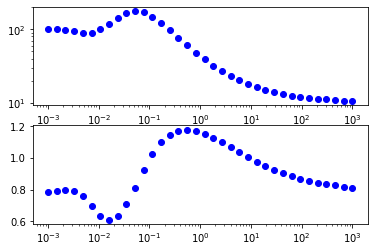

In [13]:
    fig,ax = plt.subplots(2,1)

    ax[0].loglog(1/frequencies,appres, 'o',color='blue', lw=2)
    ax[1].semilogx(1/frequencies,phases,'o', color='blue', lw=2)

# ax[0].set_xscale('log')
# ax[1].set_xscale('log')
# ax[1].set_xlabel('Frequency [Hz]')
# ax[0].set_ylabel('Apparent Resistivity [$\Omega$m]')
# ax[1].set_ylabel('Phase [radian]')